In [1]:
from halka_arz_functions import *

## Collecting Halka arz data.

In [2]:
year_period = 3
start, end = Delta_Time(years=3)
url = 'https://halkarz.com/k/halka-arz/'
print(f"Stard date {start}, end date {end}.")

Stard date 2021-04-16, end date 2024-04-16.


### Collecting name of stocks

In [8]:
start_year = dt.datetime.today().year
year_period = 3
halka_arz_pages = {}
stocks = {}
for i in range(year_period):
    year_page = url+f'{start_year - i}/'
    #halka_arz_pages.update({page : {'Pages':page_urls(page)}})
    pages = page_urls(year_page)
    for page in pages:
        page_soup = make_soup(page)
        stocks_ = page_soup.find_all(class_ = "halka-arz-list archives")
        for stock in stocks_:
            stock_content = stock.find(class_ = 'il-content')
            stock_symbol = stock_content.find(class_ = 'il-bist-kod').get_text(strip=True)
            stock_name = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['title']
            stock_page = stock_content.find(class_ = 'il-halka-arz-sirket').find('a')['href']
            stocks.update({stock_symbol :
                            {'url':stock_page,
                             'stock_name':stock_name,
                             'release_year':start_year-i}})

### Collecting details for stocks

In [3]:
for stock in stocks:
    stocks[stock].update({'Halka_arz_info': get_halka_arz_info(stocks[stock]['url'])})
    stocks[stock].update({'Halka_arz_result': get_halka_arz_result(stocks[stock]['url'])})

NameError: name 'stocks' is not defined

### Collecting historical data

In [16]:
for stock in stocks:
    print(stock)
    stocks[stock].update({'Hist_data': get_hist_data(stock, start_date=start, end_date=end)})

RGYAS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RGYAS.IS']: Exception('%ticker%: No timezone found, symbol may be delisted')



RGYAS DONE BY GOOGLE FINANCE
ENTRA
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENTRA.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



ENTRA DONE BY GOOGLE FINANCE
ODINE
[*********************100%%**********************]  1 of 1 completed
MOGAN
[*********************100%%**********************]  1 of 1 completed
ARTMS
[*********************100%%**********************]  1 of 1 completed
OBAMS
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['OBAMS.IS']: Exception("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")



OBAMS DONE BY GOOGLE FINANCE
ALVES
[*********************100%%**********************]  1 of 1 completed
LMKDC
[*********************100%%**********************]  1 of 1 completed
BORSK
[*********************100%%**********************]  1 of 1 completed
PATEK
[*********************100%%**********************]  1 of 1 completed
AVPGY
[*********************100%%**********************]  1 of 1 completed
MEGMT
[*********************100%%**********************]  1 of 1 completed
KBORU
[*********************100%%**********************]  1 of 1 completed
SURGY
[*********************100%%**********************]  1 of 1 completed
CATES
[*********************100%%**********************]  1 of 1 completed
SKYMD
[*********************100%%**********************]  1 of 1 completed
BEGYO
[*********************100%%**********************]  1 of 1 completed
AGROT
[*********************100%%**********************]  1 of 1 completed
EKOS
[*********************100%%**********************]  1 of 1 comple

### Save data.

In [2]:
with open('stocks.p', 'wb') as handle:
    pickle.dump(stocks, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'stocks' is not defined

## Data preparation

In [75]:
with open('stocks.p', 'rb') as handle:
    Stocks_copy = pickle.load(handle)

### Prepating stock info data

In [76]:
halka_arz_info_df = pd.DataFrame()
for stock in Stocks_copy:
    halka_arz_info_df = pd.concat([halka_arz_info_df, Stocks_copy[stock]['Halka_arz_info']], axis=0, join='outer', ignore_index='True')
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 17-18-19 Nisan 2024\n ...,"135,00 TL",Eşit Dağıtım **,"33,357,450 Lot",Ak Yatırım Menkul Değerler A.Ş.\n ...,RGYAS,Yıldız Pazar,NaN,NaN,NaN,NaN,NaN,NaN
1,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,4 Nisan 2024,NaN,NaN,NaN,NaN
2,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,21 Mart 2024,"43,534,318 Lot",%39.39,NaN,NaN
3,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,7 Mart 2024,"262,555,096 Lot",%10.75,BIST500,NaN
4,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,4 Mart 2024,"19,998,335 Lot",%28.56,BIST500,NaN


In [77]:
# Since there is only pre halka arz info for stock at top of list.
halka_arz_info_df.drop(index=0, inplace=True)
halka_arz_info_df.reset_index(drop=True, inplace=True)

In [78]:
# Fixing time column
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = halka_arz_info_df["Bist İlk İşlem Tarihi : "].apply(fix_time_it)
halka_arz_info_df["Bist İlk İşlem Tarihi : "] = pd.to_datetime(halka_arz_info_df["Bist İlk İşlem Tarihi : "])
halka_arz_info_df.head()

,Halka Arz Tarihi :,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,\n Aracı Kurum : \n (Konsorsiyum)\n,Bist Kodu :,Pazar :,\n Aracı Kurum : \n,Bist İlk İşlem Tarihi :,Fiili Dolaşımdaki Pay :,Fiili Dolaşımdaki Pay Oranı (%) :,Endeks :,Ek Pay :
0,\n 27-28-29 Mart 2024\n ...,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",NaN,ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04,NaN,NaN,NaN,NaN
1,\n 13-14-15 Mart 2024\n ...,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",NaN,ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,"43,534,318 Lot",%39.39,NaN,NaN
2,\n 28-29 Şubat - 1 Mart 202...,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",NaN,MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07,"262,555,096 Lot",%10.75,BIST500,NaN
3,\n 27-28 Şubat 2024\n ...,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",NaN,ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04,"19,998,335 Lot",%28.56,BIST500,NaN
4,\n 22-23 Şubat 2024\n ...,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",NaN,OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01,"96,325,004 Lot",%20.09,BIST500,NaN


In [79]:
halka_arz_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column                                                                                                   Non-Null Count  Dtype         
---  ------                                                                                                   --------------  -----         
 0   Halka Arz Tarihi :                                                                                       103 non-null    object        
 1   Halka Arz Fiyatı/Aralığı :                                                                               103 non-null    object        
 2   Dağıtım Yöntemi :                                                                                        103 non-null    object        
 3   Pay :                                                                                                    103 non-null    object        
 4   
               Aracı Kurum : 
             

In [80]:
# Droping unnecessary columns and fix some columns
info_df = halka_arz_info_df.drop(columns=['Halka Arz Tarihi : ',
                                        "\n               Aracı Kurum : \n                              (Konsorsiyum)\n                            ",
                                        'Endeks : ','Ek Pay : ',
                                        'Fiili Dolaşımdaki Pay :', 
                                        'Fiili Dolaşımdaki Pay Oranı (%) :'])
info_df.rename(columns={"\n               Aracı Kurum : \n                            ": "Aracı Kurum : ",
                         "Bist Kodu : ": "Symbol"}, inplace=True)
info_df.head()

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :
0,"10,00 TL",Eşit Dağıtım,"369,565,717 Lot",ENTRA,Yıldız Pazar,Ak Yatırım Menkul Değerler A.Ş.\n ...,2024-04-04
1,"30,00 TL",Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21
2,"11,33 TL",Eşit Dağıtım,"262,635,000 Lot",MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07
3,"25,35 TL",Eşit Dağıtım **,"20,000,000 Lot",ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04
4,"39,24 TL",Eşit Dağıtım,"96,336,345 Lot",OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01


In [81]:
# Fixing price column
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].astype(str)
info_df['Halka Arz Fiyatı/Aralığı : '].dropna(inplace=True)
info_df.drop(info_df[info_df['Halka Arz Fiyatı/Aralığı : '] == 'nan'].index, inplace=True)
info_df['Halka Arz Fiyatı/Aralığı : '] = info_df['Halka Arz Fiyatı/Aralığı : '].apply(value_fix, replace=True)

In [82]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :   103 non-null    float64       
 1   Dağıtım Yöntemi :            103 non-null    object        
 2   Pay :                        103 non-null    object        
 3   Symbol                       103 non-null    object        
 4   Pazar :                      103 non-null    object        
 5   Aracı Kurum :                103 non-null    object        
 6   Bist İlk İşlem Tarihi :      103 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.8+ KB


### Preparing historical data

In [83]:
halka_arz_result_df = pd.DataFrame()
for symbol in Stocks_copy:
    for col in Stocks_copy[symbol]['Halka_arz_result'].columns:
        Stocks_copy[symbol]['Halka_arz_result'][col] = Stocks_copy[symbol]['Halka_arz_result'][col].apply(value_fix_dot)
    Stocks_copy[symbol]['Halka_arz_result']['Symbol'] = str(symbol)
    if Stocks_copy[symbol]['Hist_data'].shape[0] == 0:
        continue
    Stocks_copy[symbol]['Halka_arz_result']['Hype_Days'] = get_hyped_days(Stocks_copy[symbol]['Hist_data'])
    halka_arz_result_df = pd.concat([halka_arz_result_df, Stocks_copy[symbol]['Halka_arz_result']], axis=0, join='outer')
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,NaN,NaN,4435.0,40131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# Here there are some problems due to website. Gonna change NaN ones with 0 for later calculations.
halka_arz_result_df.fillna(0, inplace=True)
halka_arz_result_df.reset_index(inplace=True, drop=True)
halka_arz_result_df.head()

,Yurt İçi Bireysel_Kisi,Yurt İçi Bireysel_Lot,Yurt İçi Kurumsal_Kisi,Yurt İçi Kurumsal_Lot,Symbol,Hype_Days,Yurt Dışı Kurumsal_Kisi,Yurt Dışı Kurumsal_Lot,Yurt Dışı Bireysel_Kisi,Yurt Dışı Bireysel_Lot,...,Yurtiçi Kurumsal_Kisi,Yurtiçi Kurumsal_Lot,Yurtdışı Bireysel_Kisi,Yurtdışı Bireysel_Lot,Yurtdışı Kurumsal_Kisi,Yurtdışı Kurumsal_Lot,Yüksek Başvurulu_Kisi,Yüksek Başvurulu_Lot,Yüksek Başvurulu Bireysel_Kisi,Yüksek Başvurulu Bireysel_Lot
0,3586255.0,277174288.0,276.0,92391429.0,ENTRA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3198260.0,26520000.0,182.0,15470000.0,ODINE,10.0,4.0,2210000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3502171.0,210108000.0,212.0,52527000.0,MOGAN,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2185014.0,19959421.0,49.0,448.0,ARTMS,9.0,0.0,0.0,4435.0,40131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3388122.0,47204809.0,268.0,43351355.0,OBAMS,6.0,13.0,4816818.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# Better check columns here, it may change.
halka_arz_result_df.columns

Index(['Yurt İçi Bireysel_Kisi', 'Yurt İçi Bireysel_Lot',
       'Yurt İçi Kurumsal_Kisi', 'Yurt İçi Kurumsal_Lot', 'Symbol',
       'Hype_Days', 'Yurt Dışı Kurumsal_Kisi', 'Yurt Dışı Kurumsal_Lot',
       'Yurt Dışı Bireysel_Kisi', 'Yurt Dışı Bireysel_Lot',
       'Şirket Çalışanları_Kisi', 'Şirket Çalışanları_Lot',
       'Şirket Çalışanları & Çiftçi Grubu_Kisi',
       'Şirket Çalışanları & Çiftçi Grubu_Lot', 'Grup Çalışanları_Kisi',
       'Grup Çalışanları_Lot', 'Yurt İçi Gerçek Kişi_Kisi',
       'Yurt İçi Gerçek Kişi_Lot', 'Yurt Dışı Gerçek Kişi_Kisi',
       'Yurt Dışı Gerçek Kişi_Lot', 'Kale Grubu Çalışanları_Kisi',
       'Kale Grubu Çalışanları_Lot',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Kisi',
       'Şirket Çalışanları / Çiftçi Yatırımcı_Lot', 'Yurtiçi Bireysel_Kisi',
       'Yurtiçi Bireysel_Lot', 'Yurtiçi Kurumsal_Kisi', 'Yurtiçi Kurumsal_Lot',
       'Yurtdışı Bireysel_Kisi', 'Yurtdışı Bireysel_Lot',
       'Yurtdışı Kurumsal_Kisi', 'Yurtdışı Kurumsal_Lot',
    

In [86]:
# Grouping participants
df = pd.DataFrame()
df['Symbol'] = halka_arz_result_df['Symbol']
df['HypeDays'] = halka_arz_result_df['Hype_Days']
df['Yurtici_Kisi'] = halka_arz_result_df['Yurt İçi Bireysel_Kisi'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtiçi Bireysel_Kisi']
df['Yurtici_Lot'] = halka_arz_result_df['Yurt İçi Bireysel_Lot'] + halka_arz_result_df['Yurt İçi Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtiçi Bireysel_Lot']
df['Yurtdisi_Kisi'] = halka_arz_result_df['Yurt Dışı Bireysel_Kisi'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Kisi'] + halka_arz_result_df['Yurtdışı Bireysel_Kisi']
df['Yurtdisi_Lot'] = halka_arz_result_df['Yurt Dışı Bireysel_Lot'] + halka_arz_result_df['Yurt Dışı Gerçek Kişi_Lot'] + halka_arz_result_df['Yurtdışı Bireysel_Lot']
df['Yurtici_Kurumsal'] = halka_arz_result_df['Yurt İçi Kurumsal_Kisi']  + halka_arz_result_df['Yurtiçi Kurumsal_Kisi']
df['Yurtici_Kurumsal_Lot'] = halka_arz_result_df['Yurt İçi Kurumsal_Lot']  + halka_arz_result_df['Yurtiçi Kurumsal_Lot']
df['Yurtdisi_Kurumsal'] = halka_arz_result_df['Yurt Dışı Kurumsal_Kisi']  + halka_arz_result_df['Yurtdışı Kurumsal_Kisi']
df['Yurtdisi_Kurumsal_Lot'] = halka_arz_result_df['Yurt Dışı Kurumsal_Lot']  + halka_arz_result_df['Yurtdışı Kurumsal_Lot']
df['Sirket_Calisanlari_Kisi'] = halka_arz_result_df['Şirket Çalışanları_Kisi'] + halka_arz_result_df['Grup Çalışanları_Kisi'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Kisi'] + halka_arz_result_df['Kale Grubu Çalışanları_Kisi'] 
df['Sirket_Calisanlari_Lot'] = halka_arz_result_df['Şirket Çalışanları_Lot'] + halka_arz_result_df['Grup Çalışanları_Lot'] + halka_arz_result_df['Şirket Çalışanları / Çiftçi Yatırımcı_Lot'] + halka_arz_result_df['Kale Grubu Çalışanları_Lot'] 
df['Yuksek Başvurulu_Kisi'] = halka_arz_result_df['Yüksek Başvurulu_Kisi']
df['Yuksek Başvurulu_Lot'] = halka_arz_result_df['Yüksek Başvurulu_Lot']
df['Yuksek Başvurulu Bireysel_Kisi'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Kisi']
df['Yuksek Başvurulu Bireysel_Lot'] = halka_arz_result_df['Yüksek Başvurulu Bireysel_Lot']
df.head()

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,Sirket_Calisanlari_Kisi,Sirket_Calisanlari_Lot,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,421.0,963363.0,0.0,0.0,0.0,0.0


In [87]:
df['Total_Lot'] = df['Yurtici_Lot'] + df['Yurtdisi_Lot'] + df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'] + df['Sirket_Calisanlari_Lot'] + df['Yuksek Başvurulu_Lot'] + df['Yuksek Başvurulu Bireysel_Lot']
df['Total_Kisi'] = df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'] + df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'] + df['Sirket_Calisanlari_Kisi'] + df['Yuksek Başvurulu_Kisi'] + df['Yuksek Başvurulu Bireysel_Kisi']
df['Kurumsal_Oran'] = (df['Yurtici_Kurumsal_Lot'] + df['Yurtdisi_Kurumsal_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Oran'] = (df['Yurtici_Lot'] + df['Yurtdisi_Lot'])/df['Total_Lot'] * 100
df['Bireysel_Kisi_Oran'] = (df['Yurtici_Kisi'] + df['Yurtdisi_Kisi'])/df['Total_Kisi'] * 100
df['Kurumsal_Kisi_Oran'] = (df['Yurtici_Kurumsal'] + df['Yurtdisi_Kurumsal'])/df['Total_Kisi'] * 100
df

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,...,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot,Total_Lot,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran
0,ENTRA,0.0,3586255.0,277174288.0,0.0,0.0,276.0,92391429.0,0.0,0.0,...,0.0,0.0,0.0,0.0,369565717.0,3586531.0,25.000000,75.000000,99.992305,0.007695
1,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,...,0.0,0.0,0.0,0.0,44200000.0,3198446.0,40.000000,60.000000,99.994185,0.005815
2,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,262635000.0,3502383.0,20.000000,80.000000,99.993947,0.006053
3,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20000000.0,2189498.0,0.002240,99.997760,99.997762,0.002238
4,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,...,0.0,0.0,0.0,0.0,96336345.0,3388824.0,50.000001,49.000000,99.979285,0.008292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,HTTBT,1.0,45712.0,7038462.0,0.0,0.0,87.0,12317307.0,8.0,8798077.0,...,2461.0,7038462.0,0.0,0.0,35192308.0,48268.0,59.999998,20.000001,94.704566,0.196818
99,INVES,1.0,122015.0,34390197.0,139.0,19440.0,48.0,3089363.0,1.0,1000.0,...,0.0,0.0,0.0,0.0,37500000.0,122203.0,8.240968,91.759032,99.959903,0.040097
100,DAPGM,1.0,45390.0,25815806.0,0.0,0.0,46.0,4204194.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30020000.0,45436.0,14.004644,85.995356,99.898759,0.101241
101,HUNER,0.0,242732.0,129801807.0,319.0,172130.0,49.0,26063.0,0.0,0.0,...,0.0,0.0,0.0,0.0,130000000.0,243100.0,0.020048,99.979952,99.979844,0.020156


In [88]:
df.drop(index=0, inplace=True) # Im droping it for this time, due to hyped days.
df.reset_index(drop=True)

,Symbol,HypeDays,Yurtici_Kisi,Yurtici_Lot,Yurtdisi_Kisi,Yurtdisi_Lot,Yurtici_Kurumsal,Yurtici_Kurumsal_Lot,Yurtdisi_Kurumsal,Yurtdisi_Kurumsal_Lot,...,Yuksek Başvurulu_Kisi,Yuksek Başvurulu_Lot,Yuksek Başvurulu Bireysel_Kisi,Yuksek Başvurulu Bireysel_Lot,Total_Lot,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran
0,ODINE,10.0,3198260.0,26520000.0,0.0,0.0,182.0,15470000.0,4.0,2210000.0,...,0.0,0.0,0.0,0.0,44200000.0,3198446.0,40.000000,60.000000,99.994185,0.005815
1,MOGAN,3.0,3502171.0,210108000.0,0.0,0.0,212.0,52527000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,262635000.0,3502383.0,20.000000,80.000000,99.993947,0.006053
2,ARTMS,9.0,2185014.0,19959421.0,4435.0,40131.0,49.0,448.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20000000.0,2189498.0,0.002240,99.997760,99.997762,0.002238
3,OBAMS,6.0,3388122.0,47204809.0,0.0,0.0,268.0,43351355.0,13.0,4816818.0,...,0.0,0.0,0.0,0.0,96336345.0,3388824.0,50.000001,49.000000,99.979285,0.008292
4,ALVES,9.0,2870401.0,32000000.0,0.0,0.0,215.0,8000000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40000000.0,2870616.0,20.000000,80.000000,99.992510,0.007490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,HTTBT,1.0,45712.0,7038462.0,0.0,0.0,87.0,12317307.0,8.0,8798077.0,...,2461.0,7038462.0,0.0,0.0,35192308.0,48268.0,59.999998,20.000001,94.704566,0.196818
98,INVES,1.0,122015.0,34390197.0,139.0,19440.0,48.0,3089363.0,1.0,1000.0,...,0.0,0.0,0.0,0.0,37500000.0,122203.0,8.240968,91.759032,99.959903,0.040097
99,DAPGM,1.0,45390.0,25815806.0,0.0,0.0,46.0,4204194.0,0.0,0.0,...,0.0,0.0,0.0,0.0,30020000.0,45436.0,14.004644,85.995356,99.898759,0.101241
100,HUNER,0.0,242732.0,129801807.0,319.0,172130.0,49.0,26063.0,0.0,0.0,...,0.0,0.0,0.0,0.0,130000000.0,243100.0,0.020048,99.979952,99.979844,0.020156


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 1 to 102
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Symbol                          102 non-null    object 
 1   HypeDays                        102 non-null    float64
 2   Yurtici_Kisi                    102 non-null    float64
 3   Yurtici_Lot                     102 non-null    float64
 4   Yurtdisi_Kisi                   102 non-null    float64
 5   Yurtdisi_Lot                    102 non-null    float64
 6   Yurtici_Kurumsal                102 non-null    float64
 7   Yurtici_Kurumsal_Lot            102 non-null    float64
 8   Yurtdisi_Kurumsal               102 non-null    float64
 9   Yurtdisi_Kurumsal_Lot           102 non-null    float64
 10  Sirket_Calisanlari_Kisi         102 non-null    float64
 11  Sirket_Calisanlari_Lot          102 non-null    float64
 12  Yuksek Başvurulu_Kisi           102 

### Extra

There is one more thing I want to add, their sectors and values.  In order to do this, I will use 'isyatirim' page.

In [90]:
page = 'https://www.isyatirim.com.tr/tr-tr/analiz/hisse/Sayfalar/Temel-Degerler-Ve-Oranlar.aspx#page-1'
df_extra = pd.read_html(page)[2]
df_extra.head()

,Kod,Hisse Adı,Sektör,Kapanış (TL),Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,A1CAP,A1 Capital,Aracı Kurumlar,3016,"4.071,6",1250,259,1350
1,ACSEL,Acıselsan Acıpayam Selüloz,Kimyasal Ürün,16530,"1.772,3",544,483,107
2,ADEL,Adel Kalemcilik,Kırtasiye,70500,"16.655,6",5114,276,236
3,ADESE,Adese AVM,Perakande - Ticaret,227,"2.288,2",703,929,"1.008,0"
4,ADGYO,Adra GYO,GYO,3080,"9.046,0",2778,251,2937


In [91]:
# For this part, I have to fix ',' . 
def value_fix_(value):
    return float(value.replace('.','').split(',')[0])
df_extra['Piyasa Değeri (mn $)'] = df_extra['Piyasa Değeri (mn $)'].apply(value_fix_)

In [92]:
df_extra['Piyasa Değeri (mn TL)'] = df_extra['Piyasa Değeri (mn TL)'].apply(value_fix_)
df_extra['Sermaye (mn TL)'] = df_extra['Sermaye (mn TL)'].apply(value_fix_)

In [93]:
df_extra.columns

Index(['Kod', 'Hisse Adı', 'Sektör', 'Kapanış (TL)', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)'],
      dtype='object')

In [94]:
df_extra.rename(columns={"Kod": "Symbol"}, inplace=True)
df_extra.drop(columns=['Kapanış (TL)', 'Hisse Adı'], inplace=True)
df_extra.head()

,Symbol,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,A1CAP,Aracı Kurumlar,4071.0,1250.0,259,1350.0
1,ACSEL,Kimyasal Ürün,1772.0,544.0,483,107.0
2,ADEL,Kırtasiye,16655.0,5114.0,276,236.0
3,ADESE,Perakande - Ticaret,2288.0,703.0,929,1008.0
4,ADGYO,GYO,9046.0,2778.0,251,2937.0


This dataframe contains sectors, values and some extras. With help of this data, I can finally make one whole dataframe for halka arz stocks.

### Finishing

In [95]:
df = pd.merge(info_df, df, on=["Symbol"], how="inner")
df = pd.merge(df, df_extra, on="Symbol", how="inner")
df.head()

,Halka Arz Fiyatı/Aralığı :,Dağıtım Yöntemi :,Pay :,Symbol,Pazar :,Aracı Kurum :,Bist İlk İşlem Tarihi :,HypeDays,Yurtici_Kisi,Yurtici_Lot,...,Total_Kisi,Kurumsal_Oran,Bireysel_Oran,Bireysel_Kisi_Oran,Kurumsal_Kisi_Oran,Sektör,Piyasa Değeri (mn TL),Piyasa Değeri (mn $),Halka Açıklık Oranı (%),Sermaye (mn TL)
0,30.00,Eşit Dağıtım,"44,200,000 Lot",ODINE,Yıldız Pazar,Türkiye Sınai Kalkınma Bankası A.Ş.\n ...,2024-03-21,10.0,3198260.0,26520000.0,...,3198446.0,40.000000,60.00000,99.994185,0.005815,Teknoloji,8795.0,2701.0,400,1105.0
1,11.33,Eşit Dağıtım,"262,635,000 Lot",MOGAN,Yıldız Pazar,İş Yatırım Menkul Değerler A.Ş.\n ...,2024-03-07,3.0,3502171.0,210108000.0,...,3502383.0,20.000000,80.00000,99.993947,0.006053,Elektrik Enerji Ürt.Teçh/Tesis Kurulum,40359.0,1239.0,108,2440.0
2,25.35,Eşit Dağıtım **,"20,000,000 Lot",ARTMS,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-03-04,9.0,2185014.0,19959421.0,...,2189498.0,0.002240,99.99776,99.997762,0.002238,Tekstil Entegre,4256.0,1307.0,286,700.0
3,39.24,Eşit Dağıtım,"96,336,345 Lot",OBAMS,Yıldız Pazar,Türkiye Kalkınma ve Yatırım Bankası A.Ş.\n ...,2024-03-01,6.0,3388122.0,47204809.0,...,3388824.0,50.000001,49.00000,99.979285,0.008292,Gıda,21180.0,6504.0,201,4794.0
4,19.45,Eşit Dağıtım,"40,000,000 Lot",ALVES,Ana Pazar,İnfo Yatırım Menkul Değerler A.Ş.\n ...,2024-02-29,9.0,2870401.0,32000000.0,...,2870616.0,20.000000,80.00000,99.992510,0.007490,Kablo,9296.0,2854.0,250,1600.0


### Data info

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 101
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Halka Arz Fiyatı/Aralığı :      102 non-null    float64       
 1   Dağıtım Yöntemi :               102 non-null    object        
 2   Pay :                           102 non-null    object        
 3   Symbol                          102 non-null    object        
 4   Pazar :                         102 non-null    object        
 5   Aracı Kurum :                   102 non-null    object        
 6   Bist İlk İşlem Tarihi :         102 non-null    datetime64[ns]
 7   HypeDays                        102 non-null    float64       
 8   Yurtici_Kisi                    102 non-null    float64       
 9   Yurtici_Lot                     102 non-null    float64       
 10  Yurtdisi_Kisi                   102 non-null    float64       
 11  Yurtdi

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Halka Arz Fiyatı/Aralığı :,102.0,2.563667e+01,2.540664e+01,1.100000e+00,1.097750e+01,1.805000e+01,2.810000e+01,1.300000e+02
HypeDays,102.0,4.872549e+00,4.260506e+00,0.000000e+00,1.000000e+00,5.000000e+00,8.000000e+00,1.800000e+01
Yurtici_Kisi,102.0,1.519029e+06,1.387875e+06,5.342000e+03,2.460775e+05,1.056224e+06,2.821444e+06,4.943543e+06
Yurtici_Lot,102.0,4.302668e+07,4.871362e+07,2.257920e+06,1.156500e+07,2.616790e+07,5.028125e+07,2.101080e+08
Yurtdisi_Kisi,102.0,7.272353e+02,1.732962e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.760000e+02,6.690000e+03
Yurtdisi_Lot,102.0,2.125478e+04,5.779597e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.750375e+04,3.735830e+05
Yurtici_Kurumsal,102.0,1.112157e+02,8.577493e+01,8.000000e+00,4.900000e+01,8.800000e+01,1.587500e+02,4.840000e+02
Yurtici_Kurumsal_Lot,102.0,1.318921e+07,1.806104e+07,3.500000e+01,2.722225e+04,8.054292e+06,1.542330e+07,9.310000e+07
Yurtdisi_Kurumsal,102.0,4.323529e+00,1.868825e+01,0.000000e+00,0.000000e+00,5.000000e-01,4.750000e+00,1.870000e+02
Yurtdisi_Kurumsal_Lot,102.0,3.621802e+06,1.729262e+07,0.000000e+00,0.000000e+00,3.500000e+00,1.943750e+06,1.701854e+08


### Data visualization

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\atliu\AppData\Local\Temp\ipykernel_22732\195202579.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90);


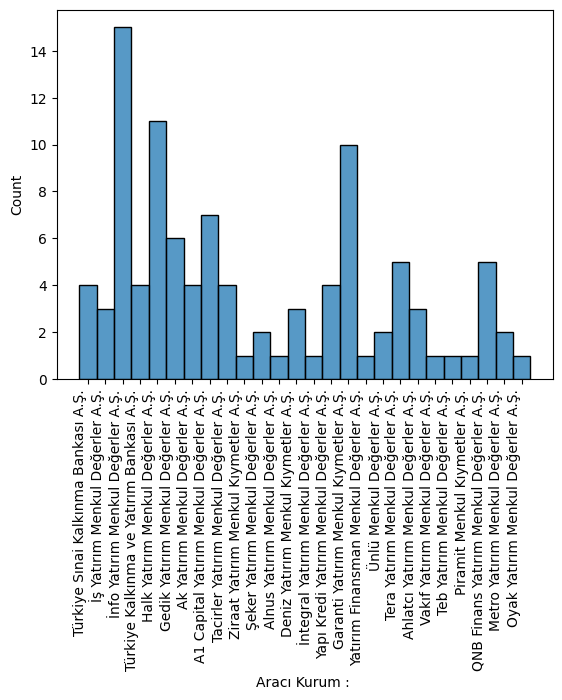

In [100]:
ax = sns.histplot(data=df, x=df["Aracı Kurum : "]);
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

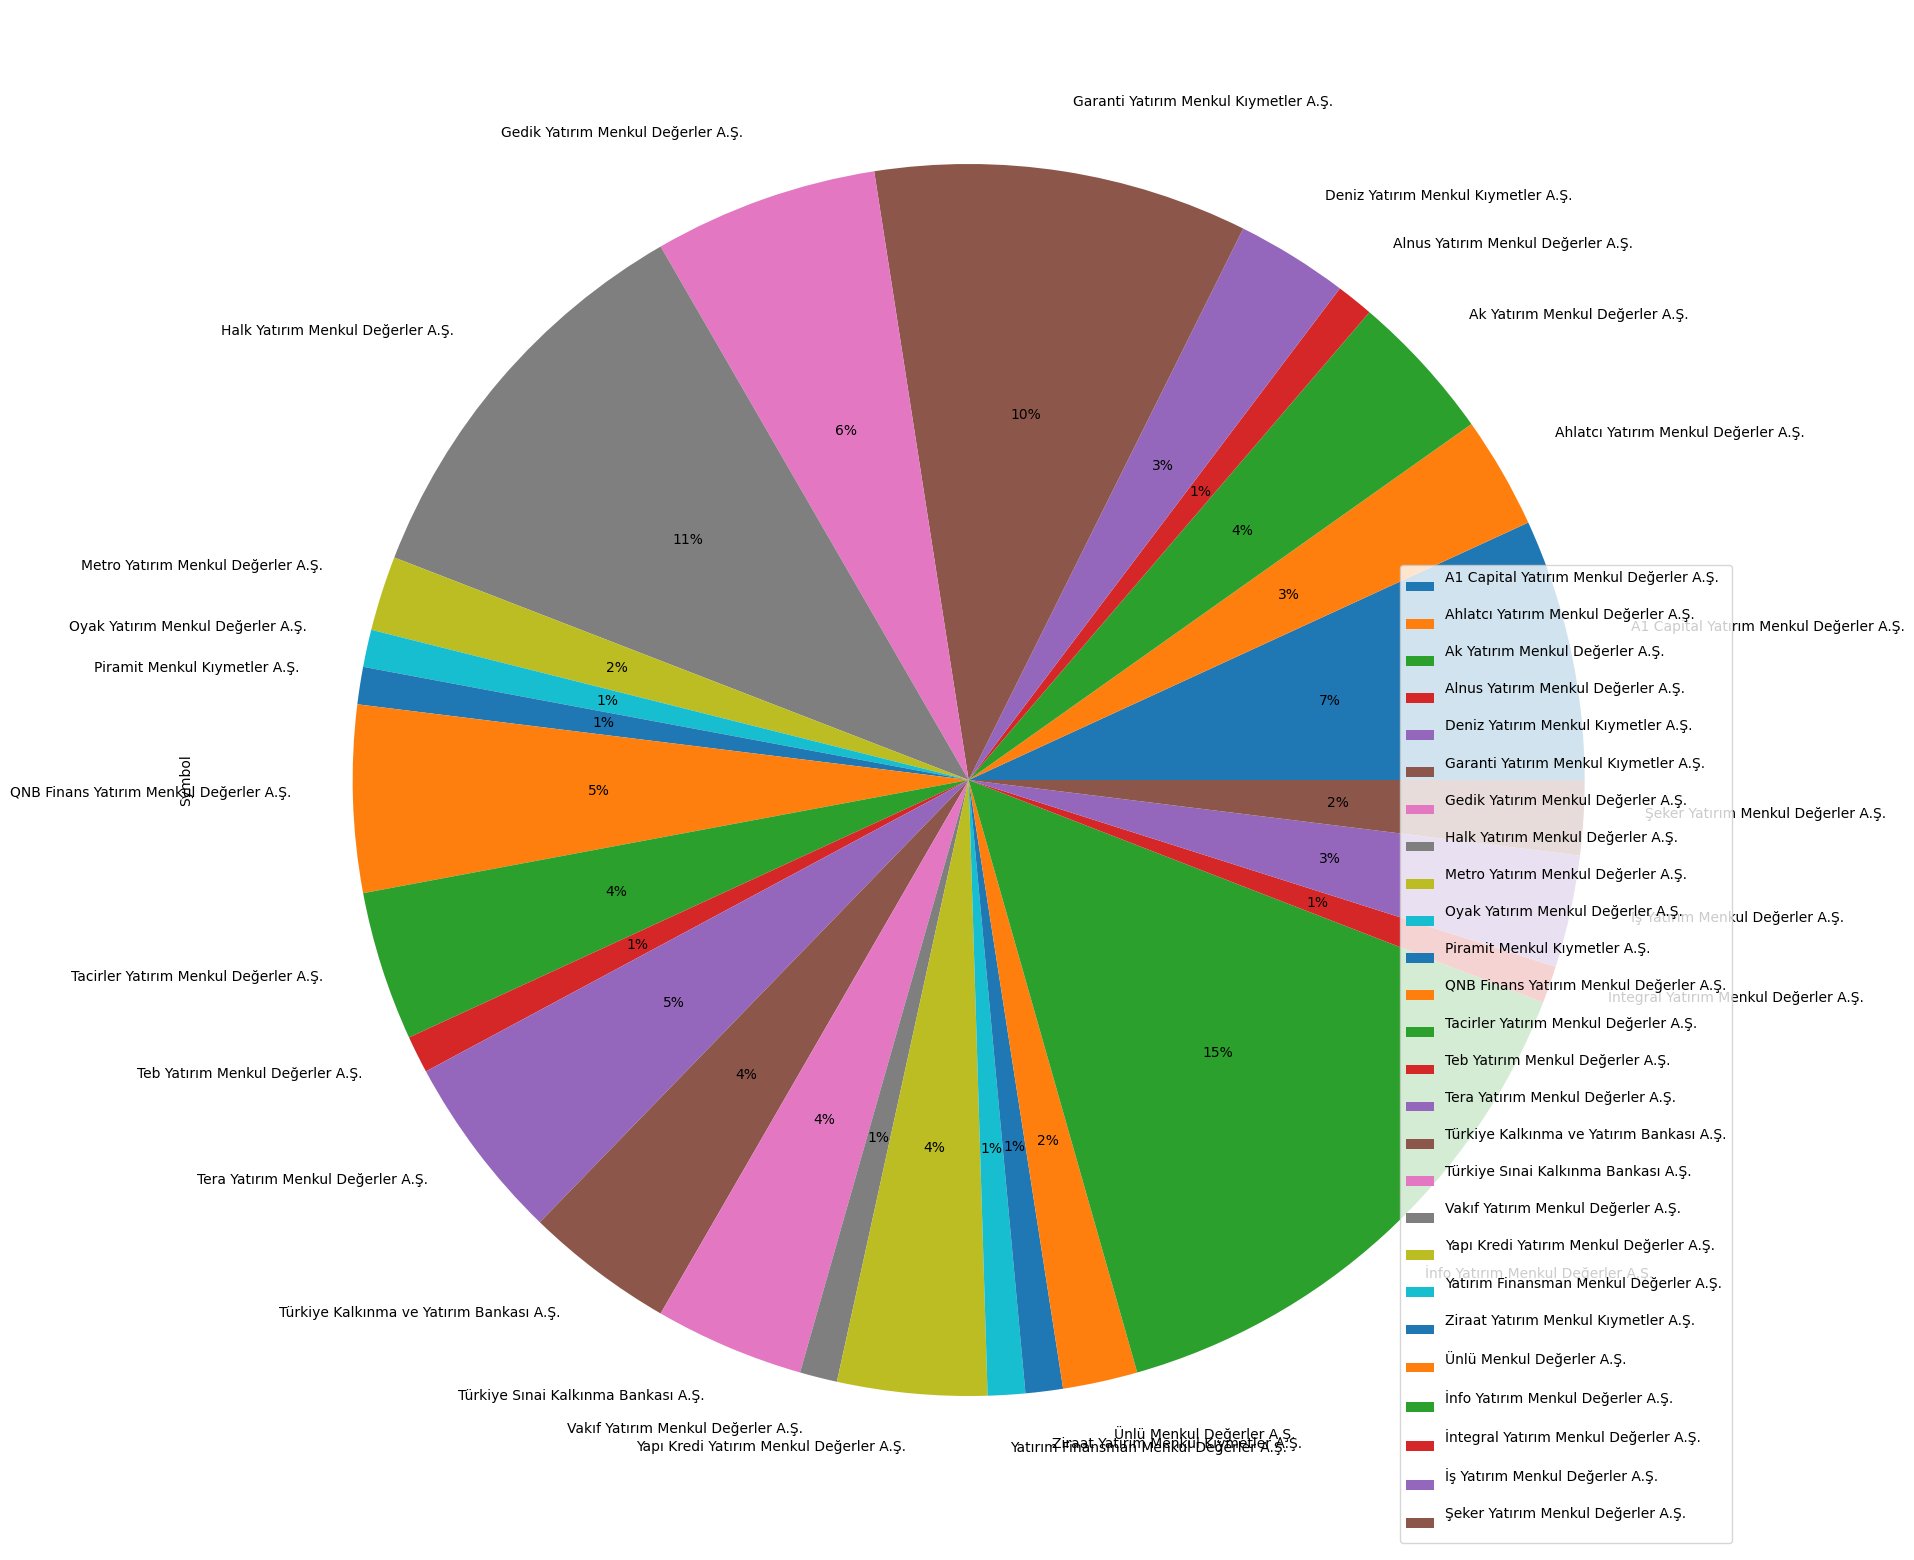

In [101]:
df.groupby(['Aracı Kurum : ']).count().plot(kind='pie', y='Symbol',autopct='%1.0f%%',figsize=(20,20));

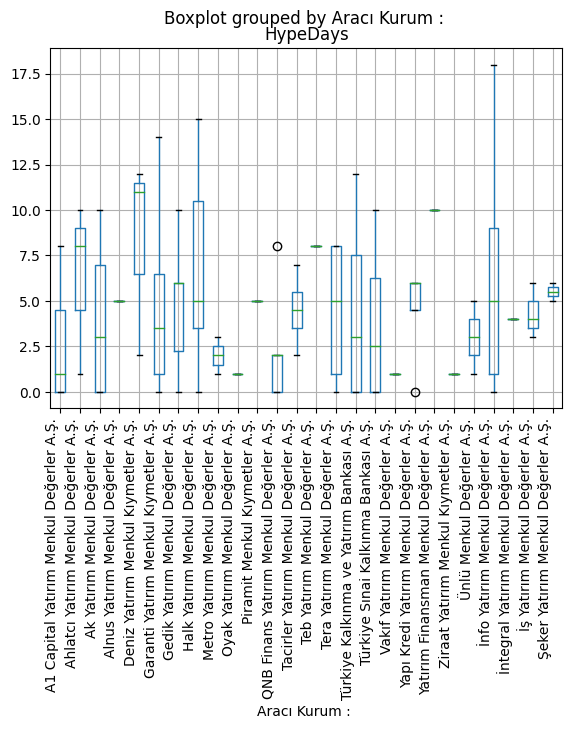

In [113]:
df.boxplot(column='HypeDays', by='Aracı Kurum : ', rot=90);

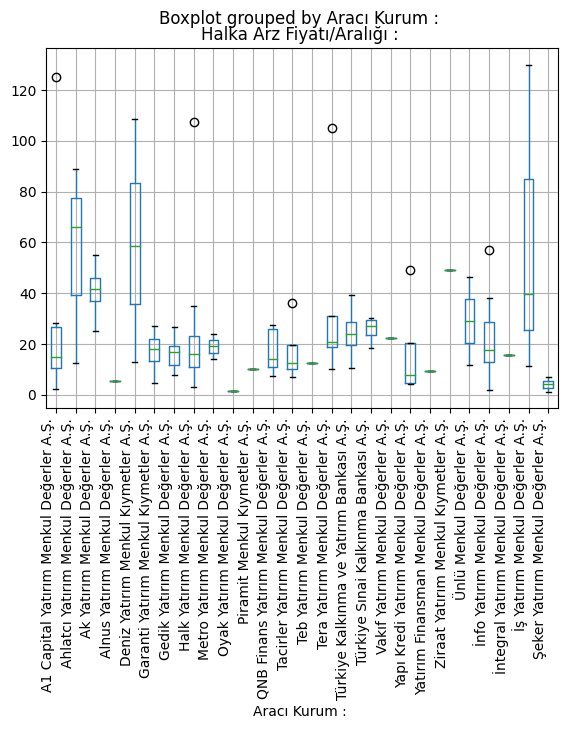

In [109]:
df.boxplot(column='Halka Arz Fiyatı/Aralığı : ', by='Aracı Kurum : ', rot=90);

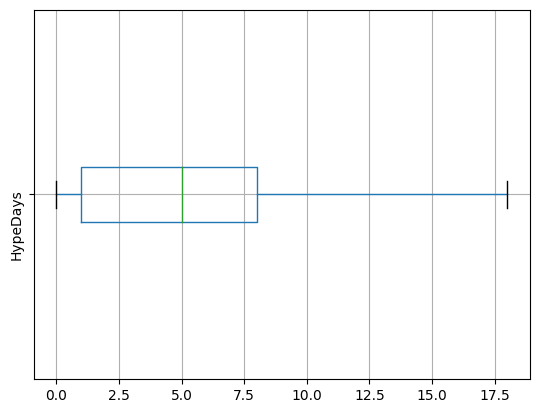

In [107]:
df.boxplot(column='HypeDays', rot=90, vert=False, grid=True);

<Axes: >

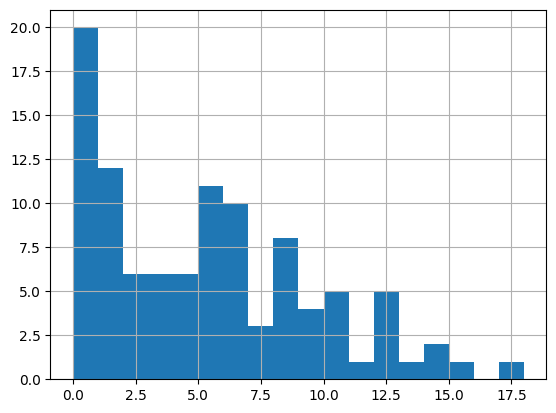

In [104]:
df['HypeDays'].hist(bins=int(df['HypeDays'].max()))

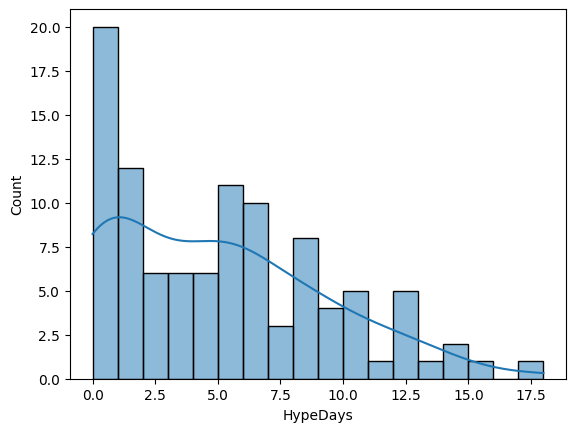

In [105]:
sns.histplot(data=df, x=df["HypeDays"], bins=int(df['HypeDays'].max()), kde=True); # This looks much better.

In [131]:
bins = [0, 10., 20., 30., 40., 50., 60., 70., 80., 90., 100.]
labels = [0, 15., 25., 35., 45., 55., 65., 75., 85., 95.]
df['New_Bireysel_Oran'] = pd.cut(df['Bireysel_Oran'], bins=bins, labels=labels)

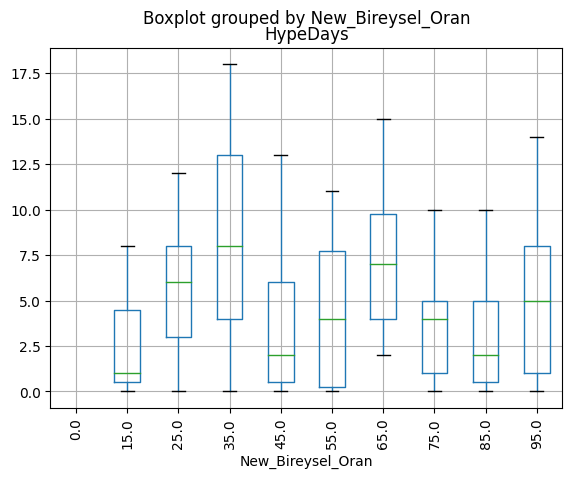

In [46]:
df.boxplot(column='HypeDays', by='New_Bireysel_Oran', rot=90);

In [132]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Piyasa Değeri (mn $)'] = pd.cut(df['Piyasa Değeri (mn $)'], bins=bins, labels=labels)

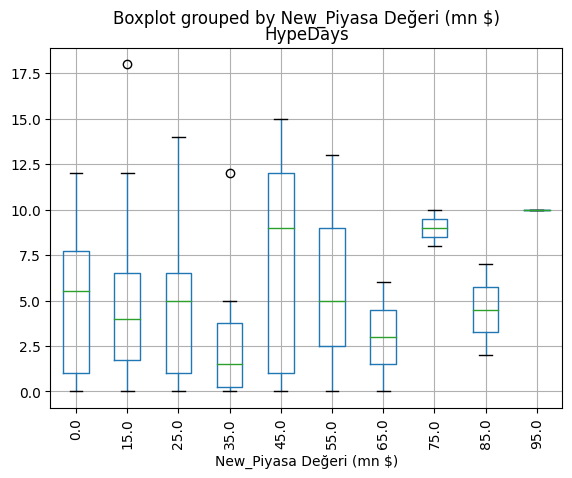

In [70]:
df.boxplot(column='HypeDays', by='New_Piyasa Değeri (mn $)', rot=90);

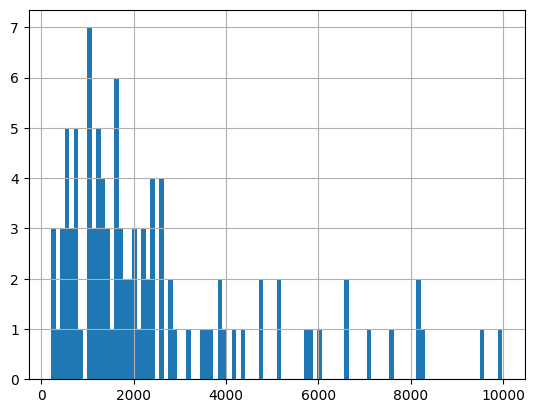

In [127]:
df['Sermaye (mn TL)'].hist(bins=100);

In [128]:
bins = [0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.]
labesl = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]
df['New_Sermaye'] = pd.cut(df['Sermaye (mn TL)'], bins=bins, labels=labels)

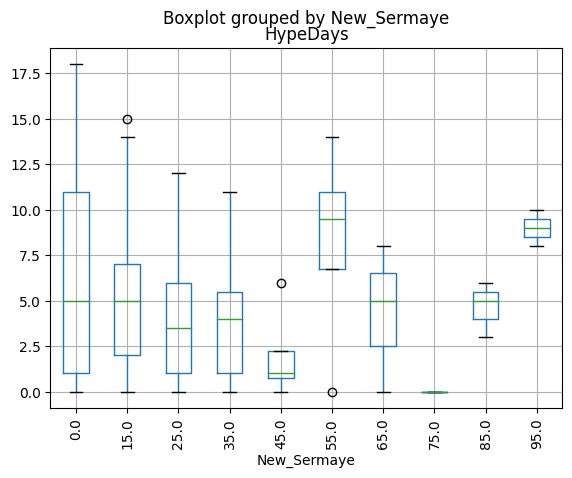

In [129]:
df.boxplot(column='HypeDays', by='New_Sermaye', rot=90);

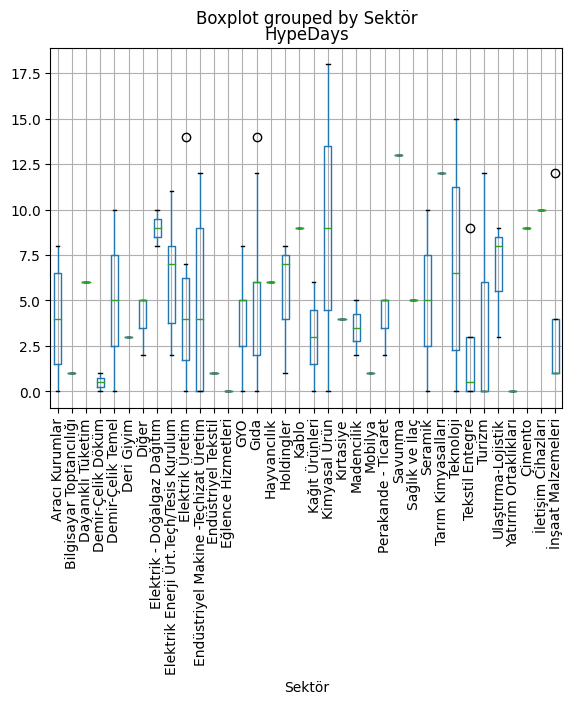

In [29]:
df.boxplot(column='HypeDays', by='Sektör', rot=90);

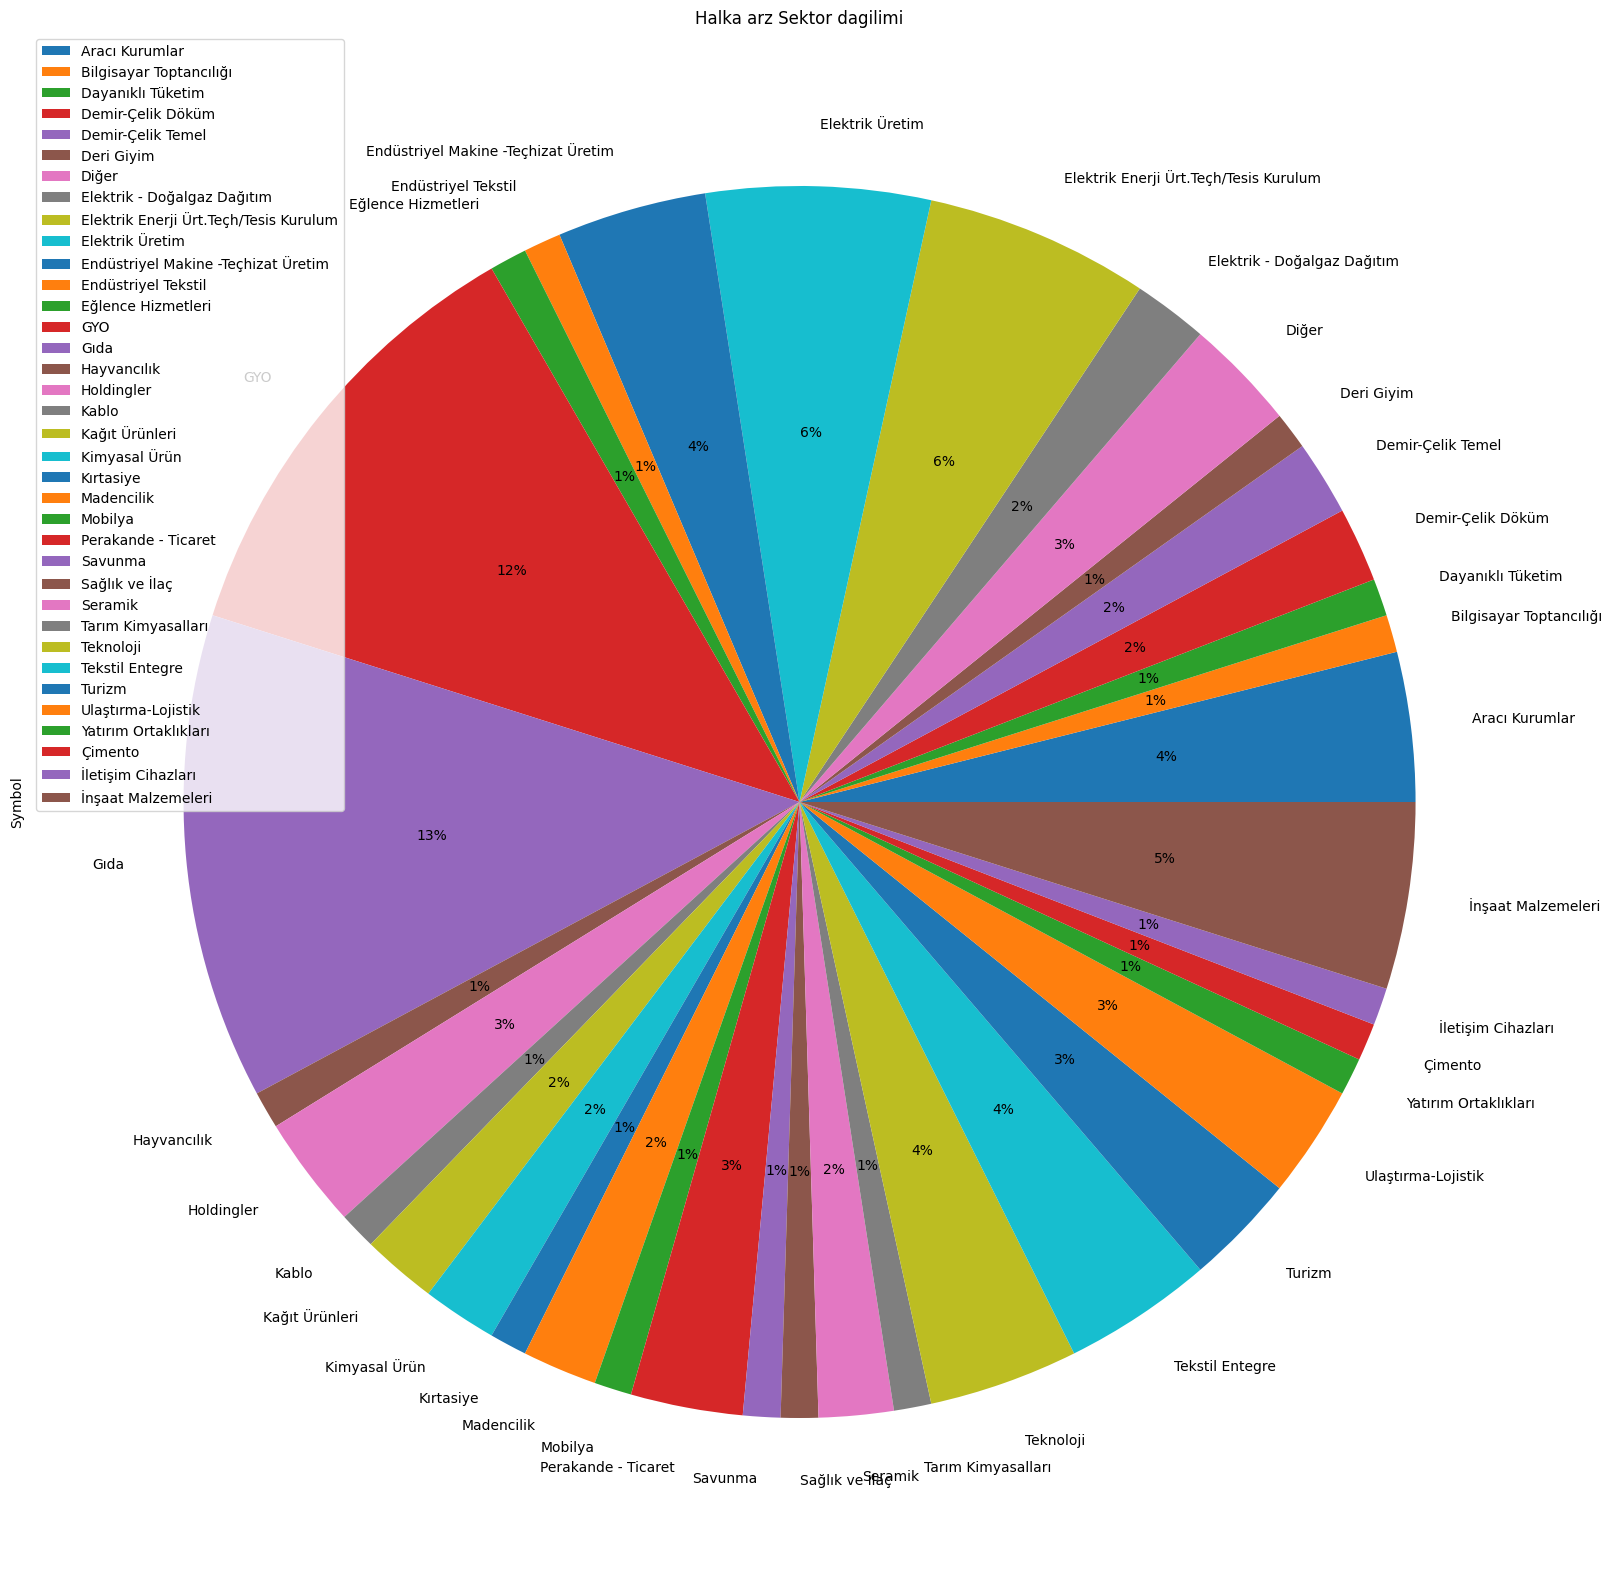

In [32]:
df.groupby(['Sektör']).count().plot(kind='pie', y='Symbol',autopct='%1.0f%%',figsize=(20,20), title='Halka arz Sektor dagilimi');

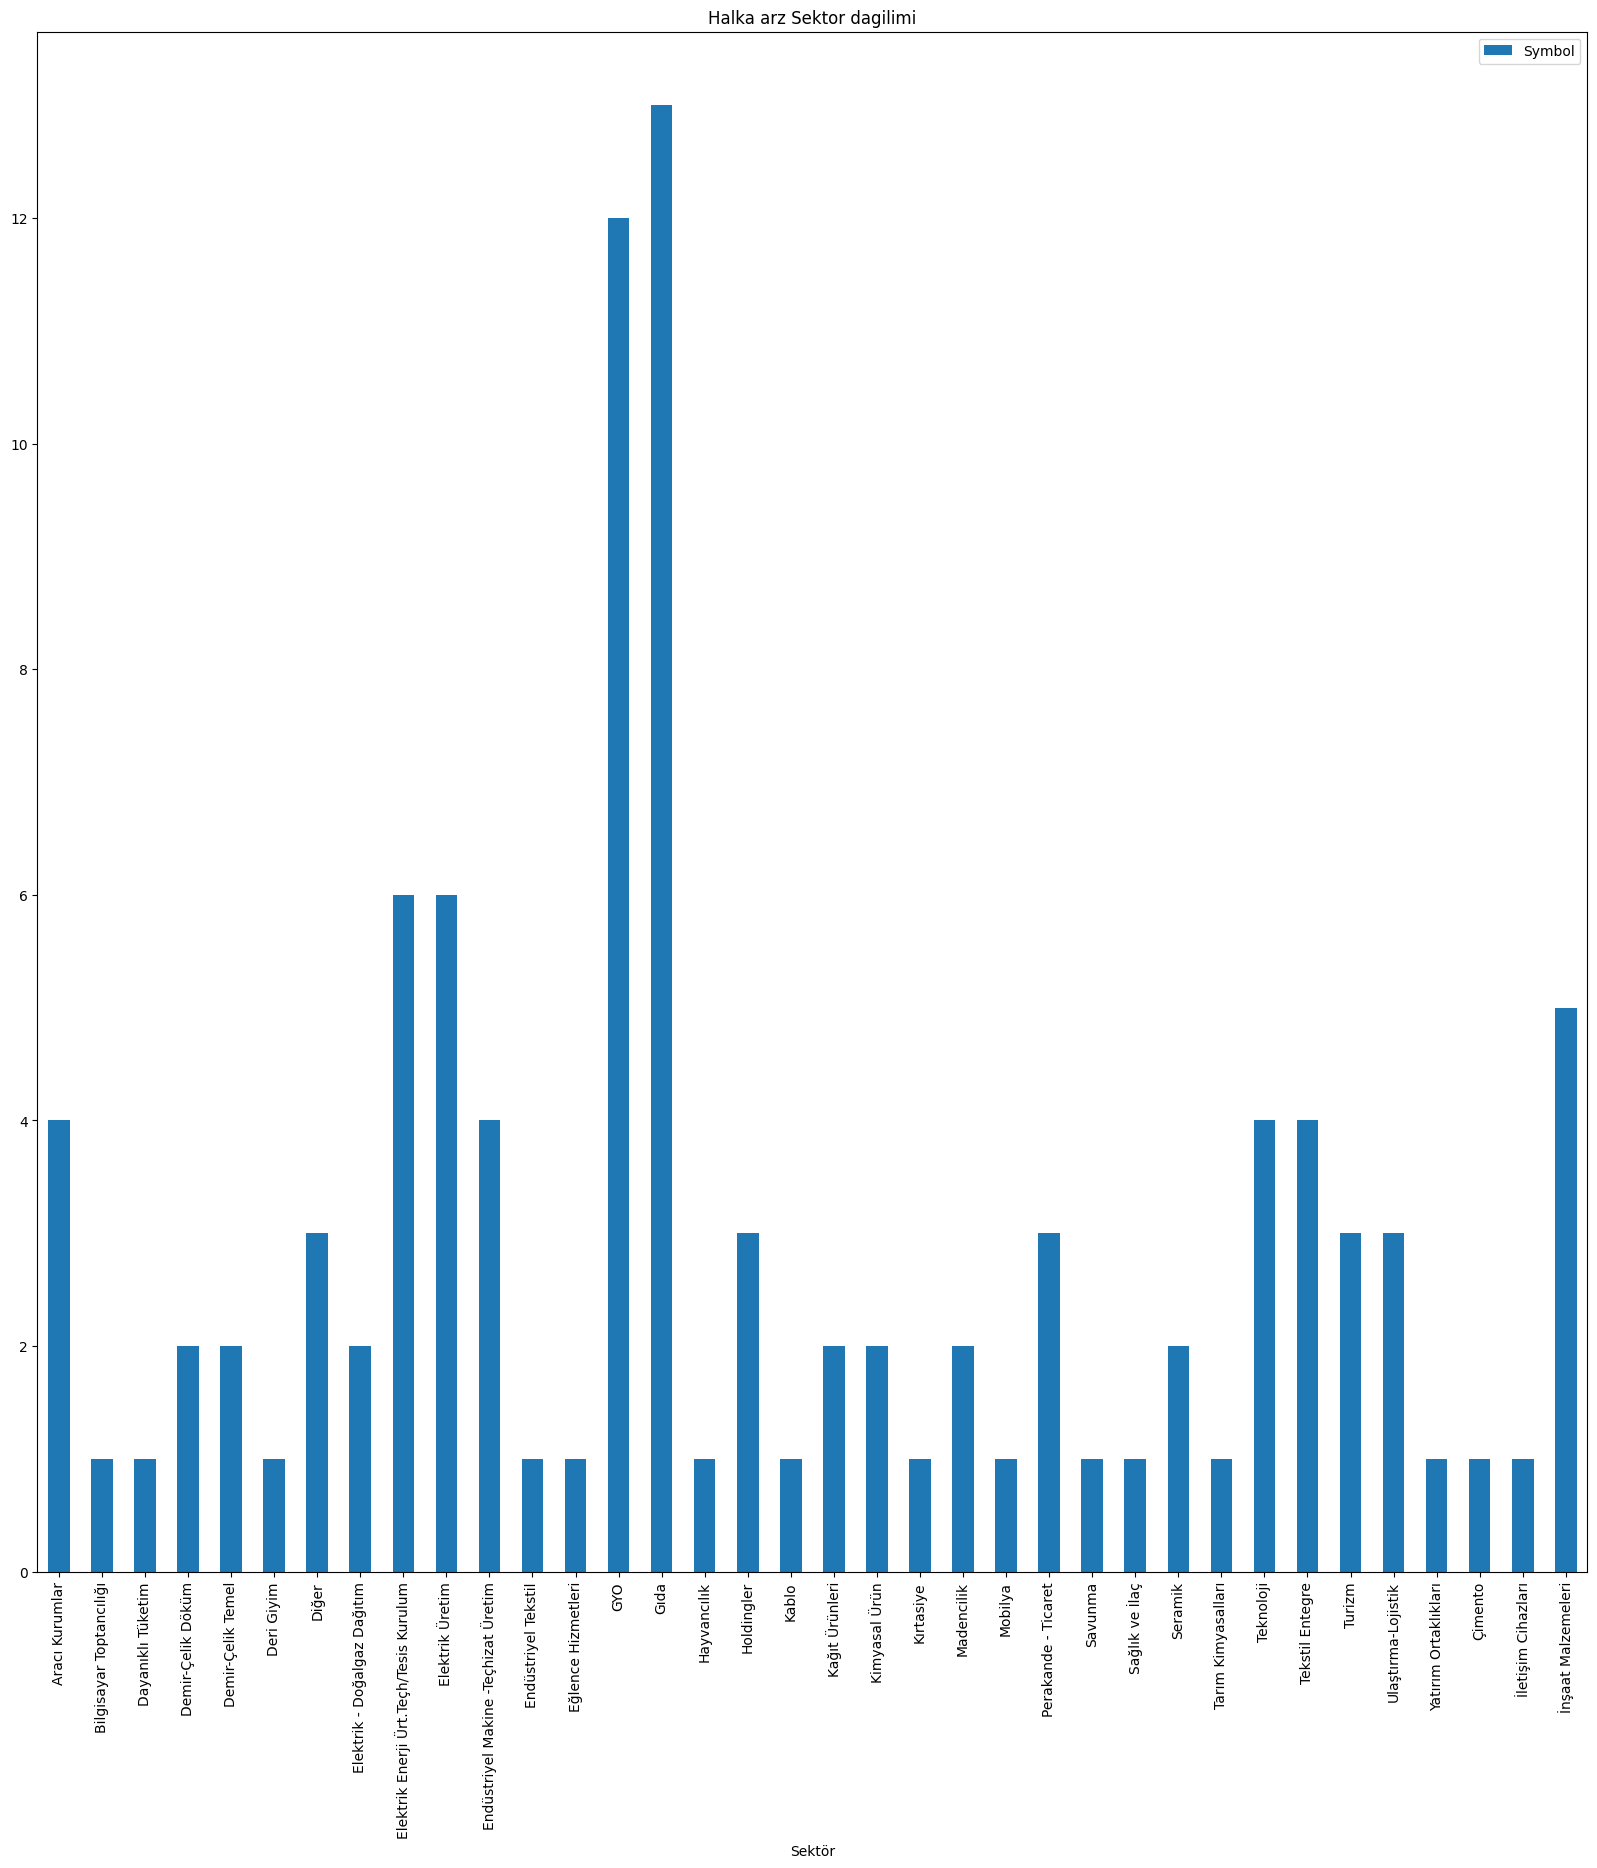

In [111]:
df.groupby(['Sektör']).count().plot(kind='bar', y='Symbol',figsize=(20,20), title='Halka arz Sektor dagilimi');

In [133]:
df.columns

Index(['Halka Arz Fiyatı/Aralığı : ', 'Dağıtım Yöntemi : ', 'Pay : ', 'Symbol',
       'Pazar : ', 'Aracı Kurum : ', 'Bist İlk İşlem Tarihi : ', 'HypeDays',
       'Yurtici_Kisi', 'Yurtici_Lot', 'Yurtdisi_Kisi', 'Yurtdisi_Lot',
       'Yurtici_Kurumsal', 'Yurtici_Kurumsal_Lot', 'Yurtdisi_Kurumsal',
       'Yurtdisi_Kurumsal_Lot', 'Sirket_Calisanlari_Kisi',
       'Sirket_Calisanlari_Lot', 'Yuksek Başvurulu_Kisi',
       'Yuksek Başvurulu_Lot', 'Yuksek Başvurulu Bireysel_Kisi',
       'Yuksek Başvurulu Bireysel_Lot', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)',
       'New_Sermaye', 'New_Bireysel_Oran', 'New_Piyasa Değeri (mn $)'],
      dtype='object')

In [138]:
df_ = df[['Halka Arz Fiyatı/Aralığı : ', 'HypeDays', 'Total_Lot', 'Total_Kisi',
       'Kurumsal_Oran', 'Bireysel_Oran', 'Bireysel_Kisi_Oran',
       'Kurumsal_Kisi_Oran', 'Sektör', 'Piyasa Değeri (mn TL)',
       'Piyasa Değeri (mn $)', 'Halka Açıklık Oranı (%)', 'Sermaye (mn TL)']]

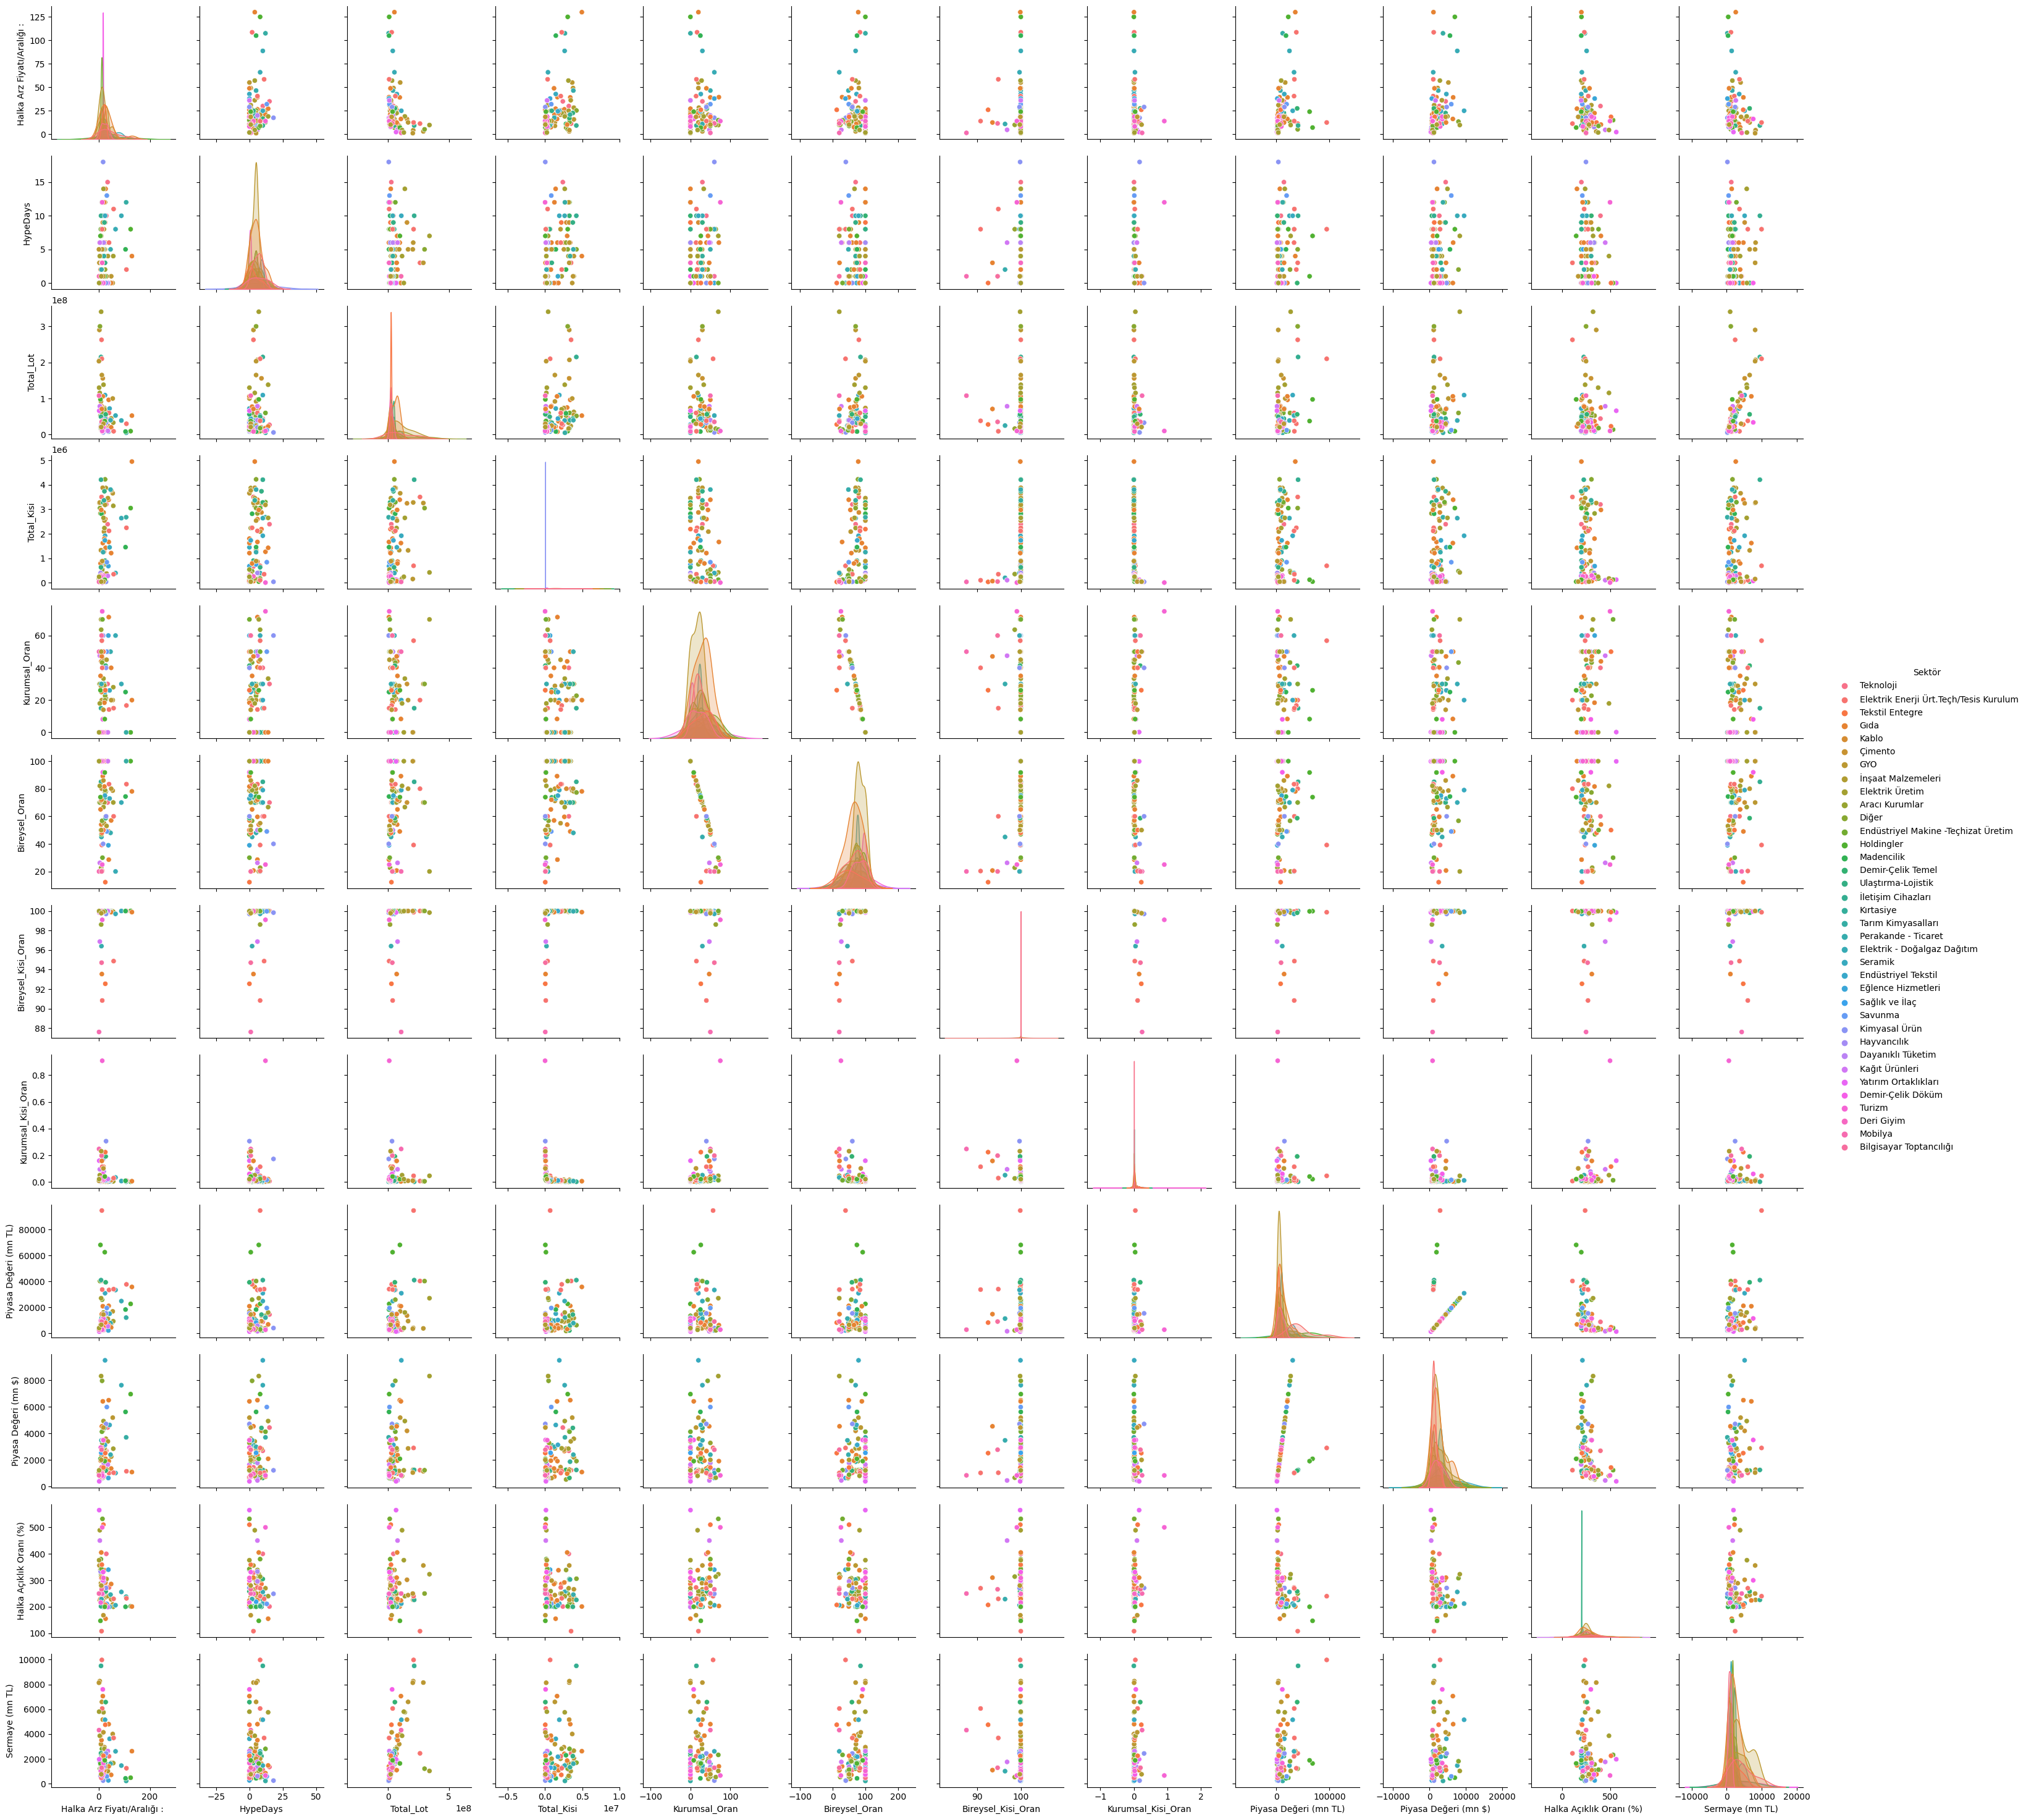

In [139]:
sns.pairplot(df_, hue='Sektör')